In [1]:
import pandas as pd
#import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib as plt1
import numpy as np
import torch
import torch.utils.data as data_utils
import skimage
from skimage.measure import label, regionprops
from skimage.transform import rotate
from numpy.random import randint
import PIL
from PIL import Image

In [ ]:
from os import listdir
onlyfiles_9 = listdir('9')
onlyfiles_8 = listdir('8')
onlyfiles_7 = listdir('7')
onlyfiles_6 = [w for w in listdir('6') if w != '.DS_Store']
onlyfiles_5 = listdir('5')
onlyfiles_4 = listdir('4')
onlyfiles_3 = listdir('3')
onlyfiles_2 = listdir('2')
onlyfiles_1 = listdir('1')
onlyfiles_0 = listdir('0')

In [ ]:
im_9 = [plt.imread('9/' + file) for file in onlyfiles_9]
im_8 = [plt.imread('8/' + file) for file in onlyfiles_8]
im_7 = [plt.imread('7/' + file) for file in onlyfiles_7]
im_6 = [plt.imread('6/' + file) for file in onlyfiles_6]
im_5 = [plt.imread('5/' + file) for file in onlyfiles_5]
im_4 = [plt.imread('4/' + file) for file in onlyfiles_4]
im_3 = [plt.imread('3/' + file) for file in onlyfiles_3]
im_2 = [plt.imread('2/' + file) for file in onlyfiles_2]
im_1 = [plt.imread('1/' + file) for file in onlyfiles_1]
im_0 = [plt.imread('0/' + file) for file in onlyfiles_0]

In [ ]:
# Free up memory
del onlyfiles_9
del onlyfiles_8
del onlyfiles_7
del onlyfiles_6
del onlyfiles_5
del onlyfiles_4
del onlyfiles_3
del onlyfiles_2
del onlyfiles_1
del onlyfiles_0

In [ ]:
# Check data is still there
_, ax = plt.subplots(1, 1 , figsize=(5, 5))
ax.imshow(im_9[0], cmap = 'gray')
ax.set_title('New Image')
ax.axis('off')
plt.show()

In [ ]:
y_9 = 9*np.ones(len(im_9))
y_8 = 8*np.ones(len(im_8))
y_7 = 7*np.ones(len(im_7))
y_6 = 6*np.ones(len(im_6))
y_5 = 5*np.ones(len(im_5))
y_4 = 4*np.ones(len(im_4))
y_3 = 3*np.ones(len(im_3))
y_2 = 2*np.ones(len(im_2))
y_1 = 1*np.ones(len(im_1))
y_0 = 0*np.ones(len(im_0))

In [ ]:
def rotated_pic(test_image, labels):
    count = 0
    test = []
    for region in regionprops(labels):
        (min_row, min_col, max_row, max_col) = region.bbox
        rotated = np.array(rotate(region.image, randint(0,360), resize = False, preserve_range = False))
        test_image[min_row:max_row, min_col:max_col] = rotated

        count = count + 1
        if count == 3:
            test = test_image
    return test

def rotated_multi_mnist(number):
    for i in range(len(number)):
        test_image = number[i]
        test_image = (test_image != 0).astype(int)*255
        labels = label(test_image)
        number[i] = rotated_pic(test_image, labels)
    return number

img_9 = rotated_multi_mnist(im_9)
img_8 = rotated_multi_mnist(im_8)
img_7 = rotated_multi_mnist(im_7)
img_6 = rotated_multi_mnist(im_6)
img_5 = rotated_multi_mnist(im_5)
img_4 = rotated_multi_mnist(im_4)
img_3 = rotated_multi_mnist(im_3)
img_2 = rotated_multi_mnist(im_2)
img_1 = rotated_multi_mnist(im_1)
img_0 = rotated_multi_mnist(im_0)

In [ ]:
# Free up memory
del im_9
del im_8
del im_7
del im_6
del im_5
del im_4
del im_3
del im_2
del im_1
del im_0

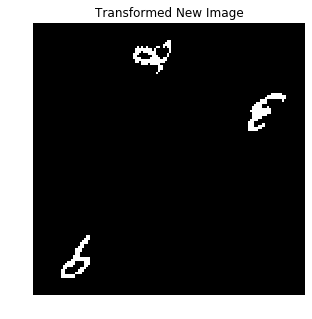

In [16]:
# Check data still there
_, ax = plt.subplots(1, 1 , figsize=(5, 5))
ax.imshow(img_9[0], cmap = 'gray')
ax.set_title('Transformed New Image')
ax.axis('off')
plt.show()

In [10]:
y = np.concatenate((y_9, y_8, y_7, y_6, y_5, y_4, y_3, y_2, y_1, y_0), axis = 0)

In [11]:
# Free up memory
del y_9
del y_8
del y_7
del y_6
del y_5
del y_4
del y_3
del y_2
del y_1
del y_0

In [13]:
X = np.concatenate((img_9, img_8, img_7, img_6, img_5, img_4, img_3, img_2, img_1, img_0), axis = 0)

In [14]:
# Free up memory
del img_9
del img_8
del img_7
del img_6
del img_5
del img_4
del img_3
del img_2
del img_1
del img_0

In [16]:
#IMPORT DATA
train_images_old = pd.read_pickle('train_max_x')
train_answers_old = pd.read_csv('train_max_y.csv')
test_images = pd.read_pickle('test_max_x')

In [17]:
#Take out the funky backgrounds
train_images_old = (train_images_old>=250).astype(float)*255
test_images_new = (test_images >= 250).astype(float)*255

In [18]:
train_answers_arr = np.array(train_answers_old['Label'])

In [19]:
# Free up memory
del test_images
del train_answers_old

In [21]:
# Add new data
train_images = np.concatenate((train_images_old, X))
train_answers = np.concatenate((train_answers_arr, y))

In [22]:
# Free up memory
del train_images_old
del train_answers_arr
del X
del y

In [24]:
#Define training, testing and validation datasets
X_test = train_images[0:10000]; X_train =train_images[10000:]; X_valid=test_images_new
y_train = train_answers[10000:]; y_test = train_answers[0:10000]

In [25]:
# Free up memory
del train_images
del test_images_new
del train_answers

In [28]:
#Add one dimension so that it can be an input for the NN
X_train = X_train.reshape(90000, 1, 128, 128)
X_test = X_test.reshape(10000, 1, 128, 128)
X_valid = X_valid.reshape(10000, 1, 128, 128)

In [29]:
#Change the type from numpy to tensor so that it can be an input for the NN
X_train = torch.from_numpy(X_train)
X_test = torch.from_numpy(X_test)
X_valid = torch.from_numpy(X_valid)

y_train = torch.from_numpy(y_train.reshape(90000))
y_test = torch.from_numpy(y_test.reshape(10000))

In [30]:
# Join the x and y values
train = data_utils.TensorDataset(X_train, y_train)
test = data_utils.TensorDataset(X_test, y_test)
valid = data_utils.TensorDataset(X_valid)

In [31]:
# Create an iterator that will split the data in batches for training
trainloader = torch.utils.data.DataLoader(train, shuffle = True, batch_size=64)
testloader = torch.utils.data.DataLoader(test, batch_size=64)
validloader = torch.utils.data.DataLoader(X_valid, batch_size=64)

In [32]:
#IMPORT LIBRARIES
import torch.nn as nn
import torch.nn.init as init
import torch.nn.functional as F

In [33]:
class Classifier(nn.Module):
    """Convnet Classifier"""
    def __init__(self):
        super(Classifier, self).__init__()
        self.conv = nn.Sequential(
            # Layer 1
            #nn.BatchNorm2d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=(3, 3), padding=1),
            nn.Dropout(p=0.5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2), stride=2),
            
            # Layer 2
            #nn.BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(3, 3), padding=1),
            nn.Dropout(p=0.5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2), stride=2),
            
            # Layer 3
            #nn.BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3, 3), padding=1),
            nn.Dropout(p=0.5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2), stride=2),
            
            # Layer 4
            #nn.BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3, 3), padding=1),
            nn.Dropout(p=0.5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2), stride=2)
        )
        # Logistic Regression
        self.clf = nn.Linear(8192, 10)

    def forward(self, x):
        out = self.conv(x)
        return self.clf(out.reshape(out.size(0), -1))

In [ ]:
import torch.utils.data as data_utils
import torch.optim as optim
from torch.autograd import Variable
import datetime as dt

In [ ]:
clf = Classifier()
optimizer = torch.optim.Adam(clf.parameters(), lr=1e-4)
criterion = nn.CrossEntropyLoss()
epochs=200
time1=dt.datetime.now()

#Will print the plots
avg_train_losses = []
avg_valid_losses = []
valid_acc = []

#Early stopping criterion: when the test accuracy does not improve by at least #epsilon for #patience epochs in a row, we stop
patience = 6
epsilon = 0.2
patience_iterator = 0
best_test_acc = 0
last_acc = 0
stop = False

#Training for loop
for epoch in range(epochs):
    losses = []
    # Train
    for batch_idx, (inputs, targets) in enumerate(trainloader):
        optimizer.zero_grad()
        inputs, targets = Variable(inputs), Variable(targets)
        outputs = clf(inputs.float())
        loss = criterion(outputs, targets.long())
        loss.backward()
        optimizer.step()
        losses.append(loss.data)
    
    avg_train_losses.append(np.mean(losses))
    print('\nEpoch : %d Loss : %.3f ' % (epoch, np.mean(losses)))
    
    # Evaluate
    clf.eval()
    total = 0
    correct = 0
    losses = []
    for batch_idx, (inputs, targets) in enumerate(testloader):
        inputs, targets = Variable(inputs), Variable(targets)
        outputs = clf(inputs.float())
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += predicted.eq(targets.data).cpu().sum()
        loss = criterion(outputs, targets.long())
        losses.append(loss.data)

    avg_valid_losses.append(np.mean(losses))
    test_acc = 100.*correct/total
    valid_acc.append(test_acc)
    print('Epoch : %d Test Acc : %.3f' % (epoch, test_acc))
    print('Epoch : %d Test Loss : %.3f ' % (epoch, np.mean(losses)))
    
    if test_acc > best_test_acc and not(stop):
        print('UPDATE: NEW BEST MODEL')
        torch.save(clf.state_dict(),'best_model.mdl')
        best_test_acc = test_acc
    if test_acc <= last_acc + epsilon:
        patience_iterator = patience_iterator + 1
        print('Iterator for early stopping now at '+str(patience_iterator)+' since improvement of test accuracy = '+str((test_acc-last_acc).item())+' <= '+str(epsilon))
    else:
        patience_iterator = 0
        print('Iterator for early stopping reset to 0 since improvement of test accuracy = '+str((test_acc-last_acc).item())+' > '+str(epsilon))
    if patience_iterator == patience:
        stop = True
        print('Early stopping')
    print('---------------------------------------------------------------')
    last_acc = test_acc
    clf.train()
    
#Training time
time2=dt.datetime.now()
print('Training time for '+str(epoch)+' epochs: '+str(time2-time1))


Epoch : 0 Loss : 2.297 
Epoch : 0 Test Acc : 27.220
Epoch : 0 Test Loss : 2.087 
UPDATE: NEW BEST MODEL
Iterator for early stopping reset to 0 since improvement of test accuracy = 27.219999313354492 > 0.2
---------------------------------------------------------------

Epoch : 1 Loss : 1.896 
Epoch : 1 Test Acc : 27.260
Epoch : 1 Test Loss : 2.064 
UPDATE: NEW BEST MODEL
Iterator for early stopping now at 1 since improvement of test accuracy = 0.04000091552734375 <= 0.2
---------------------------------------------------------------

Epoch : 2 Loss : 1.890 
Epoch : 2 Test Acc : 27.260
Epoch : 2 Test Loss : 2.042 
Iterator for early stopping now at 2 since improvement of test accuracy = 0.0 <= 0.2
---------------------------------------------------------------

Epoch : 3 Loss : 1.888 
Epoch : 3 Test Acc : 27.250
Epoch : 3 Test Loss : 2.029 
Iterator for early stopping now at 3 since improvement of test accuracy = -0.010000228881835938 <= 0.2
--------------------------------------------


Epoch : 31 Loss : 1.249 
Epoch : 31 Test Acc : 81.790
Epoch : 31 Test Loss : 0.870 
Iterator for early stopping now at 1 since improvement of test accuracy = -1.0800018310546875 <= 0.2
---------------------------------------------------------------

Epoch : 32 Loss : 1.235 
Epoch : 32 Test Acc : 83.130
Epoch : 32 Test Loss : 0.841 
UPDATE: NEW BEST MODEL
Iterator for early stopping reset to 0 since improvement of test accuracy = 1.339996337890625 > 0.2
---------------------------------------------------------------

Epoch : 33 Loss : 1.223 
Epoch : 33 Test Acc : 83.690
Epoch : 33 Test Loss : 0.862 
UPDATE: NEW BEST MODEL
Iterator for early stopping reset to 0 since improvement of test accuracy = 0.5600051879882812 > 0.2
---------------------------------------------------------------

Epoch : 34 Loss : 1.217 
Epoch : 34 Test Acc : 83.550
Epoch : 34 Test Loss : 0.837 
Iterator for early stopping now at 1 since improvement of test accuracy = -0.1399993896484375 <= 0.2
-------------------

Epoch : 63 Test Acc : 84.600
Epoch : 63 Test Loss : 0.708 
Iterator for early stopping reset to 0 since improvement of test accuracy = 0.7299957275390625 > 0.2
---------------------------------------------------------------

Epoch : 64 Loss : 0.997 
Epoch : 64 Test Acc : 84.320
Epoch : 64 Test Loss : 0.718 
Iterator for early stopping now at 1 since improvement of test accuracy = -0.279998779296875 <= 0.2
---------------------------------------------------------------

Epoch : 65 Loss : 0.994 
Epoch : 65 Test Acc : 84.090
Epoch : 65 Test Loss : 0.717 
Iterator for early stopping now at 2 since improvement of test accuracy = -0.23000335693359375 <= 0.2
---------------------------------------------------------------

Epoch : 66 Loss : 0.985 
Epoch : 66 Test Acc : 82.940
Epoch : 66 Test Loss : 0.722 
Iterator for early stopping now at 3 since improvement of test accuracy = -1.149993896484375 <= 0.2
---------------------------------------------------------------

Epoch : 67 Loss : 0.985 
E


Epoch : 96 Loss : 0.888 
Epoch : 96 Test Acc : 79.710
Epoch : 96 Test Loss : 0.778 
Iterator for early stopping now at 1 since improvement of test accuracy = -0.3000030517578125 <= 0.2
---------------------------------------------------------------

Epoch : 97 Loss : 0.889 
Epoch : 97 Test Acc : 77.350
Epoch : 97 Test Loss : 0.806 
Iterator for early stopping now at 2 since improvement of test accuracy = -2.3600006103515625 <= 0.2
---------------------------------------------------------------

Epoch : 98 Loss : 0.883 
Epoch : 98 Test Acc : 74.420
Epoch : 98 Test Loss : 0.828 
Iterator for early stopping now at 3 since improvement of test accuracy = -2.9300003051757812 <= 0.2
---------------------------------------------------------------


In [47]:
#Restore the best model
clf.load_state_dict(torch.load('best_model.mdl'))
clf.eval()

Classifier(
  (conv): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): Dropout(p=0.5, inplace=False)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): Dropout(p=0.5, inplace=False)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): Dropout(p=0.5, inplace=False)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): Dropout(p=0.5, inplace=False)
    (14): ReLU()
    (15): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (clf): Linear(in_features=8192, out_features=10, bias=True)
)

In [48]:
#Make the final predictions
pred = []
for batch_idx, inputs in enumerate(validloader):
    inputs = Variable(inputs)
    outputs = clf(inputs.float())
    _, predicted = torch.max(outputs.data, 1)
    pred.extend(predicted.tolist())
final_preds = pd.DataFrame()
final_preds['Id'] = list(range(0,10000))
final_preds['Label'] = pred
final_preds.to_csv('Prediction_6.csv', index=False)